# Några vanligt förekommande paket
Här kommer vi först introducera några av de vanligaste förekommande paketen som kommer användas på föreläsningarna: 
* Numpy
* Matplotlib
* Pandas

### Numpy

Numpy är grunden till många andra matematiska paket i python. Dess implementation gör det möjligt att göra snabba beräknar i python. 

T.ex. Att multiplicera en 300 x 300 matris.



![Matrismultiplikations exempel](../data/Matris_mul.png)

Visar hur två matriser multipliceras.

In [82]:
import numpy as np
import time

# Multiply two matrices using nested loops
def matrix_multiply(A, B):
    C = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                C[i, j] += A[i, k] * B[k, j]
    return C

# Multiply two matrices using numpy
def matrix_multiply_np(A, B):
    return np.dot(A, B)

# Compare the two methods in time
def compare_time(A, B, nbr_numpy_calls=1):
    # Nested loops time
    start = time.time()
    matrix_multiply(A, B)
    end = time.time()
    nested_time = end - start
    print("Time for nested loops: ", nested_time, " seconds")

    # Numpy time
    start = time.time()
    for i in range(nbr_numpy_calls):
        matrix_multiply_np(A, B)
    end = time.time()
    numpy_time = end - start
    print("Time for numpy: ", numpy_time, " seconds")
    
    return nested_time, numpy_time

# Create two random matrices
size = 300
nbr_numpy_calls = 1
A = np.random.rand(size, size)
B = np.random.rand(size, size)

# Compare the two methods
nested_time, numpy_time = compare_time(A, B, nbr_numpy_calls=nbr_numpy_calls)

# How many times faster is numpy?
if numpy_time > 0:
    print("Numpy is ", nested_time / numpy_time * nbr_numpy_calls, " times faster than nested loops")

Time for nested loops:  19.372102975845337  seconds
Time for numpy:  0.001026153564453125  seconds
Numpy is  18878.366403345724  times faster than nested loops


Numpy är alltså ett väldigt användbart verktyg när vi har större datamängder. 

### Vad är numpy?

Numpy är ett paket som effektivt möjliggör beräkningar med flerdimensionella vektorer. 

Data i numpy består av vektorer. Dessa kan skalas upp i fler dimensioner och skapa matriser och tensorer.

In [83]:
# Show an example of how numpy arrays are created
array = np.array([1, 2, 3, 4, 5])
print(array)

[1 2 3 4 5]


Såhär kan man komma åt data i sina vektorer

In [84]:
# Show an example of how numpy arrays are indexed
print(f"print first element: {array[0]}")
print(f"print last element: {array[-1]}")
print(f"print first two elements: {array[0:2]}")
print(f"print all but the first element: {array[1:]}")

print first element: 1
print last element: 5
print first two elements: [1 2]
print all but the first element: [2 3 4 5]


### Skapa flerdimensionella tensorer

In [85]:
# Create multidimensional arrays
multi_dim_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(f'multi-dimensional array: \n {multi_dim_array} \n')

# Show the dimensions of the array
print(f"shape of array: {multi_dim_array.shape} \n")

# How to access elements in a multidimensional array
print(f"first row: {multi_dim_array[0, :]}")
print(f"first column: {multi_dim_array[:, 0]}")
print(f"first element: {multi_dim_array[0, 0]}")


multi-dimensional array: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

shape of array: (3, 3) 

first row: [1 2 3]
first column: [1 4 7]
first element: 1


# Matplotlib.pyplot
Ett av de vanligaste bibliotek för att visulisera data i python är Matplotlib. 

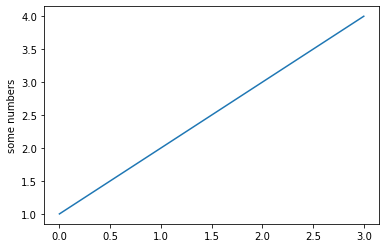

In [86]:
import matplotlib.pyplot as plt

# Make sure plots are displayed in the notebook
%matplotlib inline  

# Plot a simple line
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

### Det går också bra att rita ut flera grafer i samma figur:

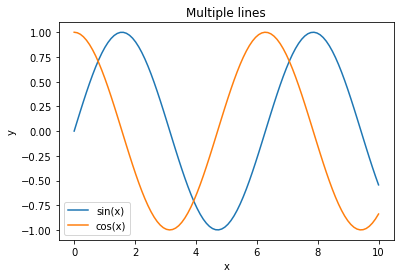

In [87]:
# Plotting multiple lines
x = np.linspace(0, 10, 100)
y = np.sin(x)
z = np.cos(x)
plt.plot(x, y, label="sin(x)")
plt.plot(x, z, label="cos(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Multiple lines")
plt.legend()
plt.show()

### Subplots
Om man behöver visa mer information i nära anslutning kan det vara en bra idé att använda sig av subplots.


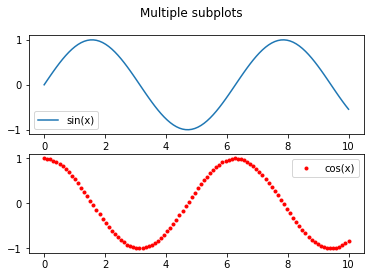

In [88]:
# Create an example with multiple subplots
plt.subplot(2, 1, 1)
plt.plot(x, y, label="sin(x)")
plt.legend()

# Create a scatter plot
plt.subplot(2, 1, 2)
plt.scatter(x, z, label="cos(x)", color="red", marker=".")
plt.legend()

plt.suptitle("Multiple subplots")

plt.show()


# Summor i programmering
Matematikens summa operator 
$$\sum_{n=1}^{100} n = 1 + 2 + 3 + 4 + ... + 100 = ?$$
kan enkelt representeras av en for-loop. Räknaren i for-loopen motsvarar *n* och antalet gånger summationen genmförs kan representeras av *N*.

Observera att vi i matematiken summerar inklusive sista talet, dvs. 100 i exemplet. Detta skiljer sig från hur `range(start, stop)` beter sig i en for-loop, då loopen stannar vid `stop - 1`.

In [89]:
N = 100

# Sum using for loop 1 to 100
sum = 0
for n in range(1, N+1): # From 1 to N + 1 because range is exclusive of the last number
    sum += n
print(f'Sum from 1 to {N} using for loop: {sum}')


Sum from 1 to 100 using for loop: 5050


In [90]:
sum2 = 0
for i in range(1, N+1):
    sum2 += 1/i
print(f'Sum of 1/i with i ranging from 1 to {N} using for loop: {sum2}')

Sum of 1/i with i ranging from 1 to 100 using for loop: 5.187377517639621


Låt oss testa en geomentrisk summa (serie):

$$\sum_{n=0}^{\infty} a^{n} = \frac{a^0}{1-a}, \quad |a|<1.$$

Då $|a|$ är mindre än 1 kommer summan konvergera till $\frac{a^0}{1-a}$. T.ex. låt $a=0.5$:

$$\sum_{n=0}^{\infty} \left(\frac{1}{2}\right) ^{n} = \left(\frac{1}{2}\right)^0 + \left(\frac{1}{2}\right)^1 + \left(\frac{1}{2}\right)^2 + ... = 1 + \frac{1}{2} + \frac{1}{4} + ... = \frac{1}{1-\frac{1}{2}} = 2$$

Kan detta stämma... Dags att undersöka med en for-loop!

In [95]:
# Number of iterations should be large
N = 500000
a = 0.5

# Create a geometric sum using a for loop
sum = 0
for n in range(0, N+1):
    sum += a**n
# Print result
print(f"Result of geometric sum using a for loop: {sum}")



Result of geometric sum using a for loop: 2.0


# Slumpförsök - Kasta tärning
Vi vill nu utför slumpförsök av tärningskast och undersöka antalet gånger ett visst tal dyker upp.



Vi börjar med att skapa en funktion som kastar en tärning med n sidor N antal gånger.  
Samtidigt håller vi reda på andel då talet x har dykt efter varje kast.

In [ ]:
# Get propotion of x showing up in an n sided die over N trials
def propotion_over_time(x, n, N):
    """
    Get propotion of x showing up in an n sided die over N trials

    x: int, the number of interest
    n: int, the number of sides of the die
    N: int, the number of trials
    """
    # Calculate the proportion of the number x during N dice tosses and append it to a list
    favurable = [np.random.randint(1, n + 1) == x for i in range(N)]
    toss_nbr = np.array(range(1, N + 1))
    prop = np.cumsum(favurable) / toss_nbr
    return prop



# Relativ frekvens
När vi genomför samma slumpförsök många gånger kan vi skapa oss en uppfattning om den relativa frekvensen av en händelse genom:
$$relativ\ frekvens = \frac{gynsamma\ fall}{antalet\ försök}.$$ 

Nedan hittar vi ett exmpel med en **n** sidig tärning där vi undersöker den relativa frekvensen för händelsen _slå **x** antal prickar_ och jämför mot den teoretiska sannolikheten.  


In [96]:
# imports
from matplotlib.animation import FuncAnimation
import matplotlib.transforms as transforms
from IPython.display import HTML

# Enter special matplotlib mode to display animation
%matplotlib notebook

In [102]:
# Parameters to dice tosses
x = 1   # Number to be tossed
n = 6   # Number of sides on the dice   
N = 10000   # Number of tosses

# Set seed for reproducibility
np.random.seed(1)   # Change or remove this line to see different results

# Parameters for the animation
number_of_frames = 50
speed = N//number_of_frames
draw_chunk = np.arange(0, speed, speed / number_of_frames)
sleep = 200.0

# Set up figure
fontsize = 16
fig, ax = plt.subplots(figsize=(14, 10))
line, = ax.plot([])
ax.set_xlim(-N*0.05, N)
ax.set_ylim(0, 1/n * 2)
ax.hlines(1/n, -N*0.05, N, color='r', linestyle='--')
ax.set_xlabel('Number of tosses', color='white', fontsize=fontsize)
ax.set_ylabel('Proportion of ' + str(x) + "s", color='white', fontsize=fontsize)
ax.set_title(f"Tossing an {n} sided die {N} times", color='white', fontsize=fontsize+5)
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,1/n, "{:.3f}".format(1/n), color="red", transform=trans, 
        ha="right", va="center")
ax.legend(['Proportion of ' + str(x) + "s", 'Expected proportion of ' + str(x) + "s"], fontsize=fontsize)

# Customize tick label colors
for tick in ax.get_xticklabels() + ax.get_yticklabels():
    tick.set_color('white')  # Change 'white' to your preferred text color

# Get proportion of x over time
prop_tosses = propotion_over_time(x, n, N)

# Calculate frames in animation
counter = 0
def animate(frame_num):
    global counter

    # Get the last frame
    if counter == number_of_frames:
        line.set_data(np.arange(N), prop_tosses)
        return line

    # Get the current chunk of data
    line.set_data(np.arange(int(frame_num * draw_chunk[counter])), prop_tosses[:int(frame_num * draw_chunk[counter])])

    # Update counter
    counter = counter + 1
    return line

# Create animation
anim = FuncAnimation(fig, animate, frames=number_of_frames, interval=sleep)

# Display animation
HTML(anim.to_jshtml())



<IPython.core.display.Javascript object>